In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import string
import requests
import math

# Questão 5


## 5.1

In [11]:
def funcV():
  ksum = 0
  k = 0 #guarda o número de elementos somados até satisfazer a condição
  while ksum < 1:
    ksum += np.random.uniform(0,1)
    k+=1
  return k
print([funcV() for i in range(10)])

[2, 3, 3, 2, 2, 2, 2, 2, 3, 4]


## 5.2

In [10]:
import numpy as np
def E_V(N, print_array=False):
  results = [funcV() for i in range(N)] # gera N amostras de V e guarda num vetor
  if print_array:
    return np.average(results), results # o vetor "results" será utilizado na próxima 
                                        # questão e guarda todas as amostras geradas de V
  else:
    return np.average(results) # retorna a média do vetor, isto é, a soma de 
                               # todas as amostras, dividido por n

n=10**5
E_V(n)

2.71829

## 5.3

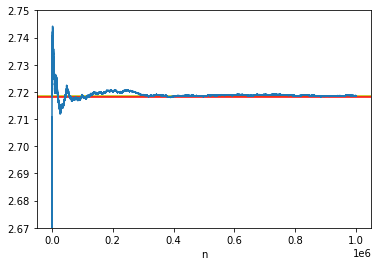

In [41]:
import matplotlib.pyplot as plt

n=10**6
value, array = E_V(n,True)
sum_array, temp = [], 0
for p,i in enumerate(array):
  temp+=i
  sum_array.append(temp/(p+1))

fig, ax = plt.subplots()
plt.axhline(y=value, color ='y')
plt.axhline(y=np.e, color ='r')
ax.plot(range(0,len(sum_array)),sum_array)
plt.xlabel('n')
plt.ylim([2.67,2.75])
plt.show()

# Questão 6

# Questão 7


## 7.1

Let the random variable X

## 7.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import string
import requests
from requests.api import head
import math
import multiprocessing as mp

alphabet = list(string.ascii_lowercase)

def generate_letters_sequence(j):
  letters = ''
  for i in range(j):
    letters+= alphabet[np.random.randint(0,len(alphabet)-1)]
  return letters

def n_domains_with_k_letters(k):
  return len(alphabet)**k

def n_domains_with_k_letters_or_less(k):
  return sum(n_domains_with_k_letters(i) for i in range(1,k+1))

def generate_domains_sample(n, k):
  n_of_all_possible_domains = n_domains_with_k_letters_or_less(k)
  domains_generated = [None]*n
  vector_pick_number_of_letters = [None]*n_of_all_possible_domains
  for i in range(1,k+1):
    vector_pick_number_of_letters[n_domains_with_k_letters_or_less(i-1):n_domains_with_k_letters_or_less(i)] = [i]*(n_domains_with_k_letters_or_less(i) - n_domains_with_k_letters_or_less(i-1))
  for i in range(n):
    j = np.random.randint(0,n_of_all_possible_domains-1)
    j = vector_pick_number_of_letters[j]
    domains_generated[i] = 'http://www.'+generate_letters_sequence(j)+'.ufrj.br'
  return domains_generated
def check_if_domain_in_use(url):
  valid_domain=0
  try:
    with head(url, stream=True) as r:
      if r.status_code==200:
        valid_domain=1
  except requests.ConnectionError:
    pass
  return valid_domain

def get_estimate_in_use_domains(n, k):
  total_in_use_domains = 0
  domains_checked = []
  n_of_all_possible_domains = n_domains_with_k_letters_or_less(k)
  domains = generate_domains_sample(n,k)

  with mp.Pool(processes=1000) as a_pool:
    domains_checked = a_pool.map(check_if_domain_in_use,domains)

  return n_of_all_possible_domains*np.sum(domains_checked)/n, domains_checked


estimate, domain_per_iter = get_estimate_in_use_domains(10**5,4)

In [ ]:
print(estimate)
print(domain_per_iter)
print(sum(domain_per_iter))

47.5254
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

# Questão 8

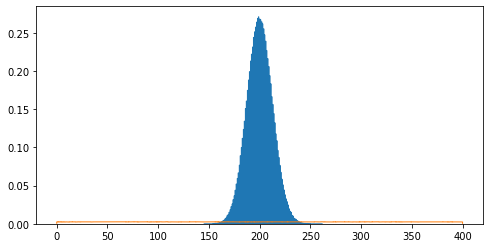

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
p = 0.2
n_bins = 1000
x = np.random.binomial(n, p, size=10**6)
z = np.random.uniform(0,400,10**6)
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=False, label='Empirical')

n, bins, patches = ax.hist(z, n_bins, density=True, histtype='step',
                           cumulative=False, label='Empirical')

# Questão 9

## Questão 9.1

In [ ]:
import numpy as np
def calc_int(n):
  return sum(np.e**(-np.random.uniform()**2)for i in range(n))/n
    
calc_int(10**7)

0.7467843027842049

## Questão 9.2